<a href="https://colab.research.google.com/github/woodRock/deep-learning-goodfellow/blob/main/chapter_4_numerical_computation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Chapter 4 | Numerical Computation

Even just evaluating mathematical function on a digital computer can be difficult when the function involves real numbers, which cannot be represented precisely using a finite amount of memory.

# Overflow and underflow

The softmax function is often used to predict the probabliites associated with a multinoulli distribution. The softmax can be defined as

$$
  softmax(x)_i = \frac{exp(x_i)}{\sum^{n}_{j=1}exp(x_j)}
$$
If c is very negative, then $exp(c)$ will underflow. If c is very large then $exp(c)$ will overflow.

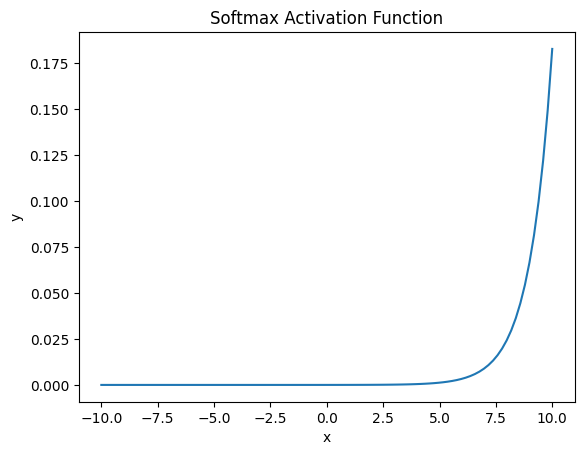

softmax(1_000_000): [nan]
softmax(-1_000_000): [nan]


<ipython-input-11-5081527b132d>:5: RuntimeWarning: overflow encountered in exp
  temp = np.exp(x)
<ipython-input-11-5081527b132d>:6: RuntimeWarning: invalid value encountered in divide
  return temp / (np.sum(temp, axis=0, keepdims=True))


In [11]:
import numpy as np
import matplotlib.pyplot as plt

def softmax(x):
    temp = np.exp(x)
    return temp / (np.sum(temp, axis=0, keepdims=True))

# Plot the softmax activation function.
x = np.linspace(-10, 10, 100)
y = softmax(x)
plt.title('Softmax Activation Function')
plt.xlabel('x')
plt.ylabel('y')
plt.plot(x, y)
plt.show()

# Overflow
numerical_overflow = softmax([1_000_000])
print(f"softmax(1_000_000): {numerical_overflow}")

# Underflow
numerical_underflow = softmax([-1_000_000])
print(f"softmax(-1_000_000): {numerical_underflow}")

# Poor conditioning

**Conditioning** refers to how rapidly a function changes with respect to small changes in its inputs.

Functions that change rapidly when their inputs are perturbed slightly can be problematic for scientific computation because rounding errors in inputs can result in large changes in the output.

Consider the function $f(x) = A^{-1}x$. When $A \in \mathbb{R}^{m\times n}$ has an eigen value decomposition, its **condition number** is

$$
  max_{i,j} = |\frac{\lambda_i}{\lambda_j}|
$$

That is the ratio of the magnitude of the largest and smallest eigenvalue. When this number is large , matrix inversion is particularly sensitive to error in the input.

In [16]:
# Poor Conditioning Example in Python

import numpy as np

# Set a random seed for reproducibility
np.random.seed(42)

# Create a poorly conditioned matrix A
n = 3
A = np.random.rand(n, n)
A[0, 1] = A[1, 0] = A[0, 2] = A[2, 0] = 1e-10
A[1, 2] = A[2, 1] = 1e-10

# Calculate the condition number of A
cond_num = np.linalg.cond(A)

# Create two slightly different input vectors
x1 = np.array([1, 2, 3])
x2 = np.array([1, 2, 3.000001])  # Tiny change in the third component

# Solve the system for both inputs
y1 = np.linalg.solve(A, x1)
y2 = np.linalg.solve(A, x2)

# Calculate the relative changes
rel_change_input = np.linalg.norm(x2 - x1) / np.linalg.norm(x1)
rel_change_output = np.linalg.norm(y2 - y1) / np.linalg.norm(y1)

print(f"Condition number of A: {cond_num:.2e}")
print(f"Relative change in input: {rel_change_input:.2e}")
print(f"Relative change in output: {rel_change_output:.2e}")
print(f"Ratio of relative changes (output/input): {rel_change_output/rel_change_input:.2e}")

print("\nMatrix A:")
print(A)
print("\ny1 =", y1)
print("y2 =", y2)

Condition number of A: 3.85e+00
Relative change in input: 2.67e-07
Relative change in output: 1.19e-07
Ratio of relative changes (output/input): 4.44e-01

Matrix A:
[[3.74540119e-01 1.00000000e-10 1.00000000e-10]
 [1.00000000e-10 1.56018640e-01 1.00000000e-10]
 [1.00000000e-10 1.00000000e-10 6.01115012e-01]]

y1 = [ 2.66994094 12.81898108  4.99072547]
y2 = [ 2.66994094 12.81898108  4.99072713]
